Stock prediction model using LSTM.

In [1]:
#Updating the modules (otherwise error message in fetching dataset from yahoo)
!pip install --upgrade pandas

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import datetime as dt

In [4]:
#Importing libraries
import pandas_datareader as dr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#2138 is training size
#549 is testing size

In [5]:
#building dataframe for Netflix stock from yahoo finance
df = yf.download('NFLX', dt.datetime(2015,1,1) , dt.datetime(2024,1,1))
df.head

[*********************100%%**********************]  1 of 1 completed


<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   49.151428   50.331429   48.731430   49.848572   49.848572   
2015-01-05   49.258572   49.258572   47.147144   47.311428   47.311428   
2015-01-06   47.347141   47.639999   45.661430   46.501431   46.501431   
2015-01-07   47.347141   47.421429   46.271427   46.742859   46.742859   
2015-01-08   47.119999   47.835712   46.478573   47.779999   47.779999   
...                ...         ...         ...         ...         ...   
2023-12-22  494.000000  496.019989  485.450012  486.760010  486.760010   
2023-12-26  489.390015  491.480011  486.380005  491.190002  491.190002   
2023-12-27  491.239990  494.019989  489.250000  491.790009  491.790009   
2023-12-28  492.000000  492.890015  489.070007  490.510010  490.510010   
2023-12-29  490.369995  492.230011  481.940002  486.880005  486.880005   

       

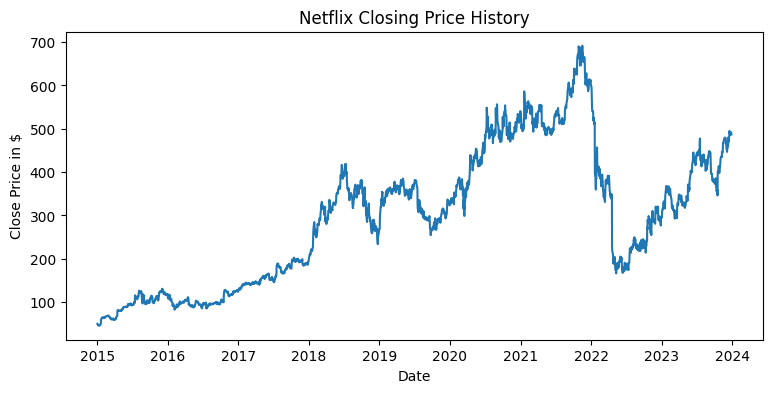

In [6]:
#Ploting tata stock price (Just for Fun)
plt.figure(figsize=(9,4))
plt.title("Netflix Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price in $')
plt.show()

In [7]:
#Filtering only required column "Here we only considering Close stock price" From DataFrame
data = df.filter(['Close'])


In [8]:
#Converting data frame to NumPy array And calculating 80% data length for training data length
dataset = data.values
train_data_len = round(len(dataset) * 0.8)

In [9]:
#Scaling the training data between 0 to 1 for our LSTM model
train_data  = dataset[0:train_data_len,:] #Taking 80% of total dataset for training

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_train = scaler.fit_transform(train_data) #Scaling training data

In [10]:
#Appending the past 60s days closing values to x_train(Inputs) and appending 61th Closing value to y_train(Output)
x_train = [] #inputs past 60 days closing values
y_train = [] #output 61th day closing value
for i in range(60, train_data_len):
  x_train.append(scaled_data_train[i-60:i,0])
  y_train.append(scaled_data_train[i,0])

In [11]:
#Converting list to NumPy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(len(x_train),60,1)
print(y_train)


[0.02163608 0.02084678 0.02105903 ... 0.48478887 0.4816626  0.45620386]


In [12]:
#Building LSTM Model and layers
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape = (60, 1)))
model.add(Dropout(0.5))
model.add(LSTM(31))
model.add(Dense(1))
print(model.summary())

C:\Users\ARNAV DUBEY\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 60)              │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 31)                  │          11,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              32 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,320 (102.81 KB)

 Trainable params: 26,320 (102.81 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
#Compling and Fit the model
model.compile(optimizer="Nadam", loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=5, epochs=5)

Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0183
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0015
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0018
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0011
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0010


In [14]:
#Appending the past 60s days closing values to x_test(Test Inputs)
test_data = dataset[train_data_len - 60: , :]
test_data = scaler.fit_transform(test_data)
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

#Storing Actual Closing values to y_test
y_test = dataset[train_data_len:, :]

In [15]:
#Converting x_test to NumPy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test),60,1)

In [16]:
#Predicting the closing value till original dataset
pred = model.predict(x_test)
pred_inverse = scaler.inverse_transform(pred)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [17]:
#Predicting Future 5 Days Values

#Predicting +1 Day from last day of dataset
x_test_59_1 = x_test[len(x_test)-1][1:60]
x_test_59_1 = np.append(x_test_59_1, [pred[len(pred)-1]], axis=0)
x_test_59_1 = x_test_59_1.reshape(1,60,1)
predp = model.predict(x_test_59_1)

#Predicting +2 Day from last day of dataset
x_test_59_2 = x_test_59_1[0][1:60]
x_test_59_2 = np.append(x_test_59_2, [predp[len(predp)-1]], axis=0)
x_test_59_2 = x_test_59_2.reshape(1,60,1)
predpp = model.predict(x_test_59_2)

#Predicting +3 Day from last day of dataset
x_test_59_3 = x_test_59_2[0][1:60]
x_test_59_3 = np.append(x_test_59_3, [predpp[len(predpp)-1]], axis=0)
x_test_59_3 = x_test_59_3.reshape(1,60,1)
predppp = model.predict(x_test_59_3)

#Predicting +4 Day from last day of dataset
x_test_59_4 = x_test_59_3[0][1:60]
x_test_59_4 = np.append(x_test_59_4, [predppp[len(predppp)-1]], axis=0)
x_test_59_4 = x_test_59_4.reshape(1,60,1)
predpppp = model.predict(x_test_59_4)

#Predicting +5 Day from last day of dataset
x_test_59_5 = x_test_59_4[0][1:60]
x_test_59_5 = np.append(x_test_59_5, [predpppp[len(predpppp)-1]], axis=0)
x_test_59_5 = x_test_59_5.reshape(1,60,1)
predppppp = model.predict(x_test_59_5)

print('+1')
print(scaler.inverse_transform(predp))
print('+2')
print(scaler.inverse_transform(predpp))
print('+3')
print(scaler.inverse_transform(predppp)) #Converting back to original value 
print('+4')
print(scaler.inverse_transform(predpppp))
print('+5')
print(scaler.inverse_transform(predppppp))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
+1
[[470.3726]]
+2
[[468.7385]]
+3
[[466.27405]]
+4
[[463.2781]]
+5
[[459.9679]]


In [18]:
#Calculating Root Mean Square Error 
rmse=np.sqrt(np.mean(((pred_inverse - y_test)**2)))
rmse 
#Last Best:- 0.9894429065605955

22.968799290314877

In [19]:
rmspe = np.sqrt(np.mean(np.square(((y_test - pred_inverse) / y_test)), axis=0))
rmspe

array([0.08166953])

In [20]:
#Adding Actual and Predicted values of closing price in valid NumPy array
train = data[:train_data_len]
valid = data[train_data_len:]
valid['pred'] = pred_inverse
valid

C:\Users\ARNAV DUBEY\AppData\Local\Temp\ipykernel_5676\3551490693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred'] = pred_inverse


,Close,pred
Date,,
2022-03-14,331.010010,351.879974
2022-03-15,343.750000,347.469788
2022-03-16,357.529999,343.852295
2022-03-17,371.399994,341.902618
2022-03-18,380.600006,342.135376
...,...,...
2023-12-22,486.760010,461.097321
2023-12-26,491.190002,464.292206
2023-12-27,491.790009,467.019653


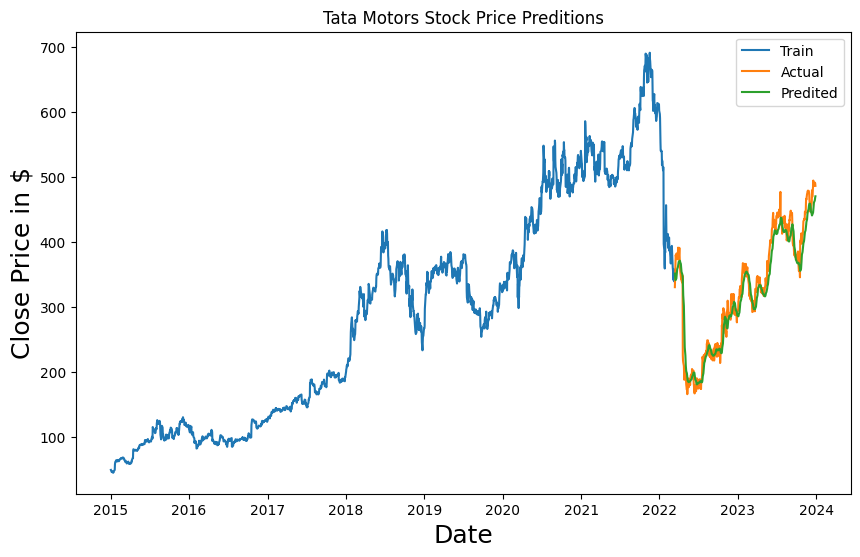

In [21]:
#Ploting the Graph for training data + Predicted data + Actual Data
plt.figure(figsize=(10,6))
plt.title("Netflix Stock Price Preditions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price in $",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train','Actual','Predited'])
plt.show()